### <p style="background-color:#DDD1B2; color:#0067A5; font-family:monospace; font-size:300%; text-align:center; border-radius: 5px 20px;">CAR MILEAGE  PREDICTION ML PROJECT</p>

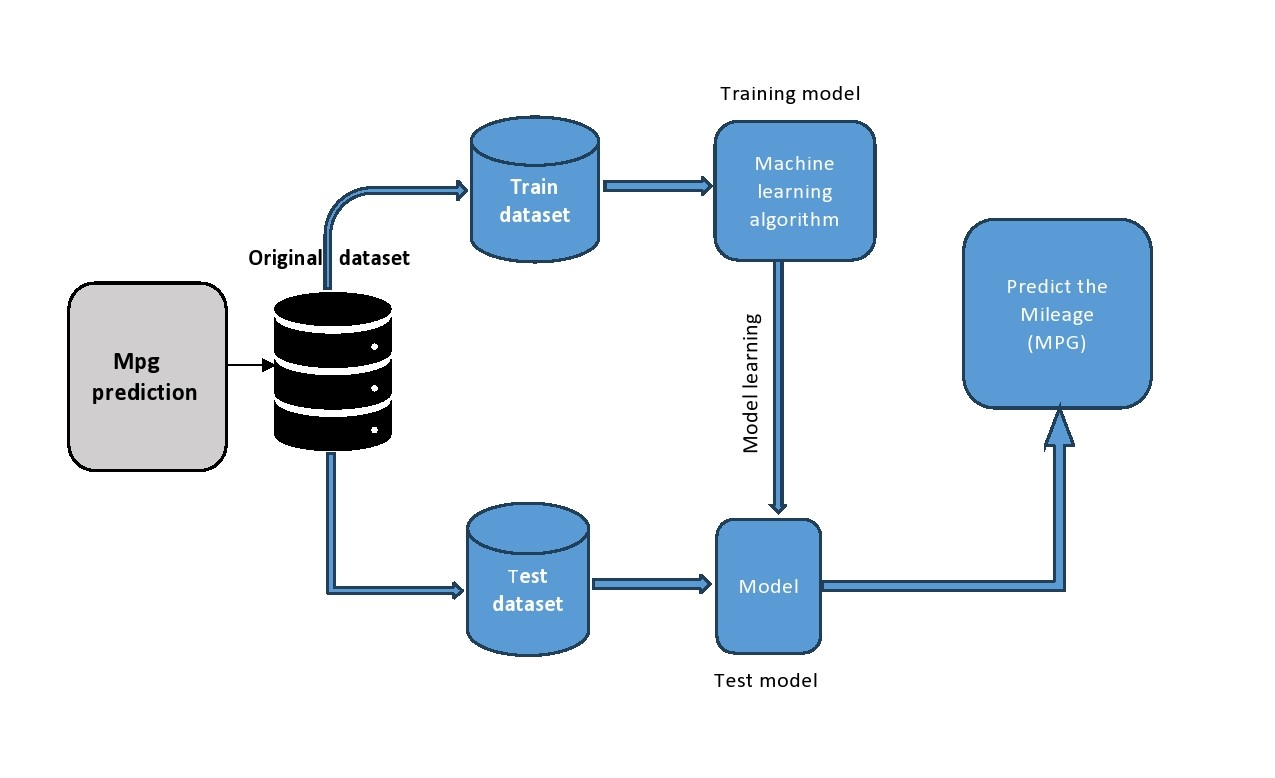

### <p style="background-color:#DDD1B2; color:#0067A5; font-family:monospace; font-size:200%; text-align:center; border-radius: 5px 20px;">MPG-PREDICTION Classification</p>

### <p style="background-color:#DDD1B2; color:#0067A5; font-family:newtimeroman; font-size:200%; text-align:center; border-radius: 5px 20px;">Table of Content</p>


* [1. Project Introduction](#1)
* [2. Loading Libraries](#2)
* [3. Loading Data](#3)
* [4. EDA 📊](#4)
    * [4.1 Data Visualization ](#4.1)    
* [5. ML Models](#5)
* [6. Data Preprocessing](#6)
    * [6.1 DATA Sampling ](#6.1)
    * [6.2 Feature Selection for Data Preparation ](#6.2)
    * [6.3 Transformation Pipelines ](#6.3)
* [7. Transform Training and Test Dataset](#7)
* [8. Model Selection](#8)
* [9. Model Testing](#9)



<a id='1'></a>
#### <p style="background-color:#DDD1B2; color:#0067A5; font-family:monospace; font-size:250%; text-align:left; border-radius: 5px 20px;">1.  PROJECT  INTRODUCTION</p> 


This project is based on  Predicting the Mileage/Miles per Gallon(mpg) of a car using some features of a car...


This project uses following parameters(Features) like-

1. mpg:           continuous (Mileage/miles per galon)
2. cylinders:     multi-values discrete (the power unit of the car) 
3. displacement:  continuous (Engine displacement of the car)
4. horsepower:    continuous (Horse power of the car) 
5. weight:        continuous (Weight of the car)
6. acceleration:  continuousthe (Acceleration of the car)
7. model year:    multi-values discrete(Model year of the car)
8. origin:        multi-valued discrete (Origin country which car belong to)
9. car name:      string (name of the car # Brand_model_variant)

The idea is to train a machine learning model to learn the relationship (weight for regression equation) between dependent variable (y) and independent variables or features (x1, x2, x3 etc).

the mileage of a vehicle doesn’t depend purely on only these parameters. There are several other factors in play like direction and strength of wind, city roads, city traffic, weather, driver experience and ability etc.

### Target Variable:--> 
mpg : contains the fuel consumption value(in Miles per Gallon) for car            

### Model description

• Numpy, Pandas, Matplotlib, Seaborn libraries have been used for Data Cleaning, Exploratory Data Analysis, and Data Visualization.

• Categorical Features are encoded using OneHotEncoder and LabelEncoder.

• Feature Scaling, and Feature Selection Techniques have been performed.

• On this dataset we use 5 regresssion model --> Linear Regression, SVR() or SVM(),SGDRegressor, Random forest Regressor, Decision Tree Regressor model have been used to predict the mpg values.

• Accuracy score: 91% using Random Forest Regressor.

<a id='2'></a>
### <p style="background-color:#DDD1B2; color:#0067A5; font-family:monospace; font-size:200%; text-align:left; border-radius: 5px 20px;">2. Loading Libraries...</p>

In [14]:
#----------------- EDA Libraries-------------------------------------
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#---------------------------------------------------------------------

#------------------- Transformers and Data Pipelines------------------
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline # sequential pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
#----------------------------------------------------------------------

#-----------------------Data Sampling----------------------------------
from sklearn.model_selection import train_test_split
#----------------------------------------------------------------------

#-----------------------Machine Learning Models------------------------
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
#-----------------------------------------------------------------------

#-----------------------Evaluation Metrices------------------------------
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

<a id='3'></a>
### <p style="background-color:#DDD1B2; color:#0067A5; font-family:monospace; font-size:200%; text-align:left; border-radius: 5px 20px;">3. Loading Data....</p>

In [15]:
#------------------------------Load and Sample Data Into Train and Test Datasets----------------------------

mpg = sns.load_dataset("mpg")

<a id='4'></a>
# <p style="background-color:#DDD1B2; color:#0067A5; font-family:newtimeroman; font-size:150%; text-align:left; border-radius: 15px 50px;">4. EDA 📊</p>


Exploratory Data Analysis (EDA) : EDA is an approach that is used to analyze the data and discover trends, patterns, or check assumptions in data with the help of statistical summaries and graphical representations.

Types of EDA(Depending on the number of columns we are analyzing )

1. Univariate Analysis  
2. Bi-Variate analysis
3. Multivariate Analysis 

Depending on the type of analysis we can also subcategorize EDA into two parts. 

Non-graphical Analysis – In non-graphical analysis, we analyze data using statistical tools like mean median or mode or                              skewness.

Graphical Analysis –     In graphical analysis, we use visualizations charts to visualize trends and patterns in the data.

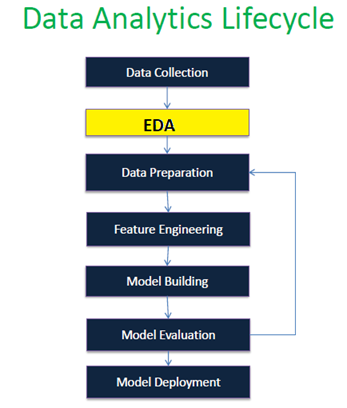

In [16]:
def rmse(y, y_hat):
    mse = mean_squared_error(y, y_hat)
    return np.sqrt(mse)
#-------------------------------------------------------------------------

<a id='4.1'></a>
# <p style="background-color:#DDD1B2; color:#0067A5; font-family:newtimeroman; font-size:100%; text-align:left; border-radius: 15px 50px;">4.1 Data Visualization 📊</p>

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

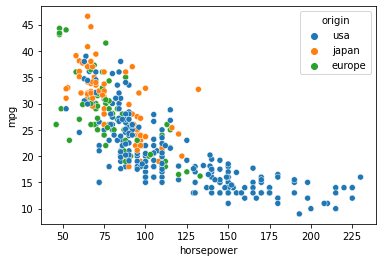

In [17]:
sns.scatterplot(data=mpg, x="horsepower", y="mpg", hue="origin")

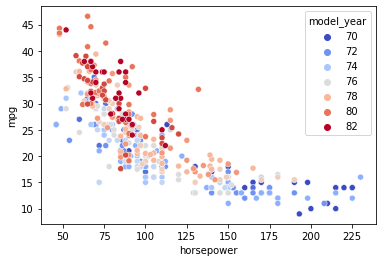

In [18]:
sns.scatterplot(data=mpg, x="horsepower", y="mpg", hue="model_year", palette="coolwarm")
plt.show()

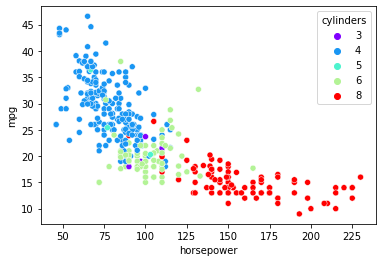

In [19]:
sns.scatterplot(data=mpg, x="horsepower", y="mpg", hue="cylinders", palette="rainbow")
plt.show()

 mpg and acceleration varies with the number of cylinders.

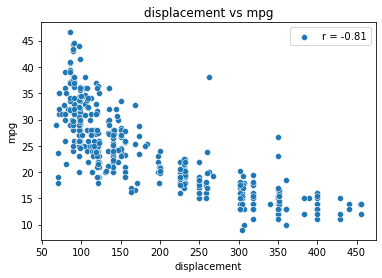

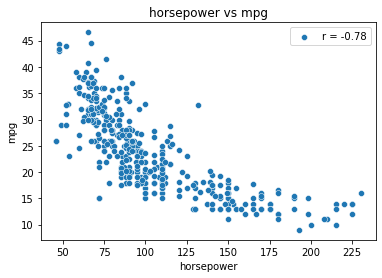

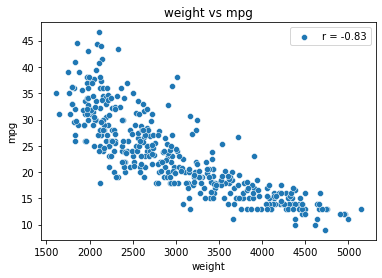

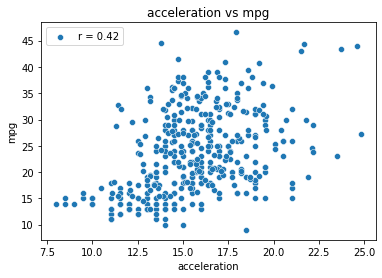

In [20]:
num_features = ["displacement", "horsepower", "weight", "acceleration"]

for X in num_features:
    plt.title(f"{X} vs mpg")
    r = round(np.corrcoef(mpg.dropna()[X], mpg.dropna()["mpg"])[0, 1], 2)
    sns.scatterplot(data=mpg, x=X, y="mpg", label=f"r = {r:0.2f}")
    plt.legend()
    plt.show()

mpg and acceleration varies with the number of cylinders.

the distribution of the independent numeric variables before fitting our regression model. We will take a look at the distributions of acceleration, cylinders, displacement, weight and horsepower.

In [21]:
#---------------------Custom Transformer-----------------------------------
class FeatureAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.in_column = "name"
    def fit(self, X, y=None):
        # X -> Data Frame 
        return self
    def transform(self, X, y=None):
        X[self.in_column] = X[self.in_column].str.split(" ", expand=True)[0]
        return X
    def fit_transform(self, X, y=None):
        self.fit(X, y) # parameter 
        return self.transform(X, y) # act to transform
#-------------------------------------------------------------------------------  

<a id='5'></a>
# <p style="background-color:#DDD1B2; color:#0067A5; font-family:newtimeroman; font-size:150%; text-align:left; border-radius: 15px 50px;">5. ML MODELS </p>


In [22]:
#-----------------------Function to Dry run various Estimators (ML Models) for Model Selection---------
def train_ml_models(models, X_train_tr, X_test_tr, y_train, y_test):
    result = {"Model Name": [], "Train Accuracy": [], "Test Accuracy": [],
             "Train Error": [], "Test Error": []}
    
    title = "|{:^30}|{:^18}|{:^18}|{:^18}|{:^18}|"
    width = 108
    # model name  train accuracy     test accuracy    train error   test error 
    print("_"*width)
    print(title.format("Model Name", "Train Accuracy %", "Test Accuracy %", "Train Error", "Test Error"))
    print("_"*width)
    for model in models:
        model.fit(X_train_tr, y_train)
        y_hat_train = model.predict(X_train_tr)
        y_hat_test = model.predict(X_test_tr)
        tr_acc = round(r2_score(y_train, y_hat_train)*100, 2)
        ts_acc = round(r2_score(y_test, y_hat_test)*100, 2)
        tr_err = round(rmse(y_train, y_hat_train), 2)
        ts_err = round(rmse(y_test, y_hat_test), 2)
        result["Model Name"].append(model)
        result["Train Accuracy"].append(tr_acc)
        result["Test Accuracy"].append(ts_acc)
        result["Train Error"].append(tr_err)
        result["Test Error"].append(ts_err)
        print(title.format(str(model), tr_acc, ts_acc, tr_err, ts_err))
        print("-"*width)
    return pd.DataFrame(result)
#---------------------------------------------------------------------------------------------------------

<a id='6'></a>
# <p style="background-color:#DDD1B2; color:#0067A5; font-family:newtimeroman; font-size:150%; text-align:left; border-radius: 15px 50px;">6. DATA PREPROCESSING </p>



<a id='6.1'></a>
# <p style="background-color:#DDD1B2; color:#0067A5; font-family:newtimeroman; font-size:100%; text-align:left; border-radius: 15px 50px;">6.1 Data Sampling</p>


In [23]:
#------------------------------Load and Sample Data Into Train and Test Datasets----------------------------


X = mpg.drop("mpg", axis=1) # features
y = mpg["mpg"] # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.08, random_state=131)
# sampling
#------------------------------------------------------------------------------------------------------------

<a id='6.2'></a>
# <p style="background-color:#DDD1B2; color:#0067A5; font-family:newtimeroman; font-size:100%; text-align:left; border-radius: 15px 50px;">6.2 Feature Selection For Data Preparation</p>


here we are selecting 4 numerical features -->  "displacement", "horsepower", "weight", "acceleration" 

one nominal feature --> "origin"

In [24]:
#-------------------------------Feature Selection for Data Prepration or Data Modeling for ML Model-----------
num_features = ["displacement", "horsepower", "weight", "acceleration"] # num_pipeline
nominal_columns = ["origin"] # 1 column --> OneHotEncoder  # -> 3 columns
ordinal_columns = ["name", "model_year", "cylinders"] # 
#pass_through_columns = ["cylinders"]
#drop_columns = ["model_year"]
#--------------------------------------------------------------------------------------------------------------

<a id='6.3'></a>
# <p style="background-color:#DDD1B2; color:#0067A5; font-family:newtimeroman; font-size:100%; text-align:left; border-radius: 15px 50px;">6.3 Transformation Pipelines</p>


(Numerical Pipeline)    num_pipeline --  Pipeline use to handle numerical data 

(Categorical Pipeline ) cat_pipeline -- Pipeline to handle categorical data 
#### SimpleImputer() :
it is used to handle the missing data in the predictive model dataset.it replace the NaN values with a specified placeholder
#### OneHotEncoder()  :
One Hot encoding is a technique that we use to represent categorical variables as numerical values in machine learning model 
#### OrdinalEncoder()  :
it is a technique to tranform categorical features into a numerical format
#### FeatureAdder()  :
its is used to adding some extra feature in dataset 

In [25]:
#------------------------------Data Pipelines to get data ready for ML Model------------------------------------

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),# T1
    #("scaler", StandardScaler())# T2
]) # 4 columns --> T1 -> T2 --> 4 columns 

cat_pipeline = Pipeline([
    ("feature adder", FeatureAdder()), # T1
    ("ordinal encoder", OrdinalEncoder()) # T2
]) # 1 column -> T1 -> T2 -> 1 column


pipeline = ColumnTransformer([
    ("num pipeline", num_pipeline, num_features), # 4 column "displacement", "horsepower", "weight", "acceleration" 
    ("nominal transformer", OneHotEncoder(), nominal_columns), # 3 column  "europe", "japan", "usa"
    ("ordinal transformer", cat_pipeline, ordinal_columns), # 1 column -> "company name", "model year"
    #("dont' change", "passthrough", pass_through_columns), # 1 column -> "cylinders"
    #("drop columns", "drop", drop_columns) # ?
])
#-------------------------------------------------------------------------------------------------------------------

<a id='7'></a>
# <p style="background-color:#DDD1B2; color:#0067A5; font-family:newtimeroman; font-size:150%; text-align:left; border-radius: 15px 50px;">7. Transform Training and Test Dataset</p>


In [26]:
#-----------------------Transforming Training and Test Datasets using Data Pipelines---------------------------------
X_train_tr = pipeline.fit_transform(X_train)
X_test_tr = pipeline.transform(X_test)

scaler = StandardScaler()
X_train_tr = scaler.fit_transform(X_train_tr)
X_test_tr = scaler.transform(X_test_tr)
#---------------------------------------------------------------------------------------------------------------------

<a id='8'></a>
# <p style="background-color:#DDD1B2; color:#0067A5; font-family:newtimeroman; font-size:150%; text-align:left; border-radius: 15px 50px;">8. Model Selection</p>
                                                                 

Various ML model for testing
### LinearRegression()  :
Linear regression is a type of supervised machine learning algorithm that computes the linear relationship between dependent variable and one or more independent features. 
### SGDRegressor(): 
SGD Regressor is a machine learning algorithm that uses stochastic gradient descent to make predictions. To predict a continuous variable, such as a price or a probability, it uses a specific kind of linear regression.
SGD Regressor works by taking a dataset as input and then using its gradient descent algorithm to find the best fit line through the data.
### DecisionTreeRegressor()
Decision Tree is one of the most commonly used, practical approaches for supervised learning. It can be used to solve both Regression and Classification tasks with the latter being put more into practical application.

### SVR():
SVM regression or Support Vector Regression (SVR) is a machine learning algorithm used for regression analysis. It is        different from traditional linear regression methods as it finds a hyperplane that best fits the data points in a continuous space, instead of fitting a line to the data points.
### RandomForestRegressor()
Random forest is one of the most popular algorithms for regression problems because of its simplicity and high accuracy.
Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap and Aggregation, commonly known as bagging. 

In [27]:
#-----------------------Selecting Various ML Models to Train----------------------------------------------------------
models = [LinearRegression(), SGDRegressor(), DecisionTreeRegressor(), SVR(), RandomForestRegressor()]
#----------------------------------------------------------------------------------------------------------------------

<a id='9'></a>
# <p style="background-color:#DDD1B2; color:#0067A5; font-family:newtimeroman; font-size:150%; text-align:left; border-radius: 15px 50px;">9. Model Testing</p>
                                                                 

In [28]:
#-----------------------Selection Good Fit Model out of All Models-----------------------------------------------------
result = train_ml_models(models, X_train_tr, X_test_tr, y_train, y_test)
#-----------------------------------------------------------------------------------------------------------------------

____________________________________________________________________________________________________________
|          Model Name          | Train Accuracy % | Test Accuracy %  |   Train Error    |    Test Error    |
____________________________________________________________________________________________________________
|      LinearRegression()      |      82.61       |      85.93       |       3.24       |       3.03       |
------------------------------------------------------------------------------------------------------------
|        SGDRegressor()        |      82.46       |      85.28       |       3.26       |       3.1        |
------------------------------------------------------------------------------------------------------------
|   DecisionTreeRegressor()    |      100.0       |      74.46       |       0.0        |       4.09       |
------------------------------------------------------------------------------------------------------------
|            SVR() 

### RESULT : 
now we can analyze  best model to fit on this dataset 

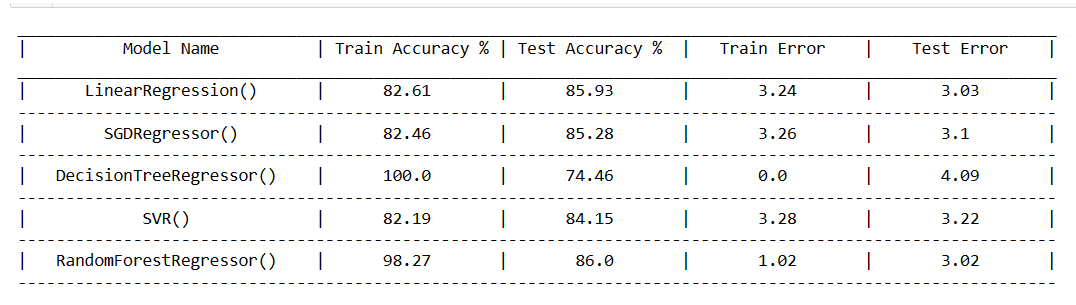